# Imports

In [1]:
import numpy as np

In [2]:
from utils import *

# Bayesian optimization

In [3]:
from bayes_opt import BayesianOptimization

In [5]:
def objective(
        alpha,
        alpha_decay,
        alpha_min,
        epsilon,
        epsilon_decay,
        epsilon_min,
        gamma,
        surrogate_c_interval,
        surrogate_c_interval_min,
        ):
    # # 'surrogate_lr'    
    # convergence_number_of_consequent_actions
    # intial_q_values: [0, -7]

    surrogate_c_interval = int(surrogate_c_interval)
    surrogate_c_interval_min = int(surrogate_c_interval_min)

    new_params = {
        'alpha': alpha, 
        'alpha_decay': alpha_decay,
        'alpha_min': alpha_min,
        'epsilon': epsilon, 
        'epsilon_decay': epsilon_decay,
        'epsilon_min': epsilon_min,
        'gamma': gamma,
        'surrogate_c_interval': surrogate_c_interval,   
        'surrogate_c_interval_min': surrogate_c_interval_min,
    }

    params = {
        'max_steps': 75,
        'num_episodes': 1000,
        'num_actions': 7, 
        'correct_action': 1,    # Zero indexed 
        'plots': False,
        #
        'noise': True,
        'surrogate': True,
    }    

    params = params | new_params
    
    q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
    


    # params['surrogate'] = False
    # q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy_no_surrogate, _ = qLearningExperiment(params=params)


    # accuracy = accuracy_surrogate - accuracy_no_surrogate
    
    # mean_episode_length = np.mean(episode_lengths)
    # print(mean_episode_length)
    # return -mean_episode_length
    return accuracy

optimizer = BayesianOptimization(
    f=objective,
    pbounds={
        'alpha': (0, 1), 
        'alpha_decay': (1, 1000),
        'alpha_min': (0, 1),
        'epsilon': (0, 1), 
        'epsilon_decay': (1, 1000),
        'epsilon_min': (0, 1),
        'gamma': (0, 1),
        'surrogate_c_interval': (1, 120),
        'surrogate_c_interval_min': (1, 120),
        },
    random_state=1,
)

# n_iter: How many steps of bayesian optimization you want to perform. 
# The more steps the more likely to find a good maximum you are.
# init_points: How many steps of random exploration you want to perform.
# Random exploration can help by diversifying the exploration space.
optimizer.maximize(
    init_points=10,
    n_iter=10,
)

best_params = optimizer.max['params']

print(optimizer.max)

|   iter    |  target   |   alpha   | alpha_... | alpha_min |  epsilon  | epsilo... | epsilo... |   gamma   | surrog... | surrog... |
-------------------------------------------------------------------------------------------------------------------------------------


100%|██████████| 1000/1000 [00:02<00:00, 405.82it/s]


| 1         | 53.9      | 0.417     | 720.6     | 0.0001144 | 0.3023    | 147.6     | 0.09234   | 0.1863    | 42.12     | 48.22     |


100%|██████████| 1000/1000 [00:02<00:00, 390.57it/s]


| 2         | 94.8      | 0.5388    | 419.8     | 0.6852    | 0.2045    | 878.2     | 0.02739   | 0.6705    | 50.66     | 67.48     |


100%|██████████| 1000/1000 [00:02<00:00, 435.13it/s]


| 3         | 97.9      | 0.1404    | 198.9     | 0.8007    | 0.9683    | 314.1     | 0.6923    | 0.8764    | 107.5     | 11.12     |


100%|██████████| 1000/1000 [00:02<00:00, 432.56it/s]


| 4         | 94.4      | 0.03905   | 170.7     | 0.8781    | 0.09835   | 421.7     | 0.9579    | 0.5332    | 83.33     | 38.55     |


100%|██████████| 1000/1000 [00:02<00:00, 418.58it/s]


| 5         | 79.8      | 0.6865    | 834.8     | 0.01829   | 0.7501    | 988.9     | 0.7482    | 0.2804    | 94.92     | 13.28     |


100%|██████████| 1000/1000 [00:03<00:00, 330.56it/s]


| 6         | 94.2      | 0.4479    | 908.7     | 0.2936    | 0.2878    | 130.9     | 0.01937   | 0.6788    | 26.18     | 32.6      |


100%|██████████| 1000/1000 [00:02<00:00, 385.48it/s]


| 7         | 66.8      | 0.4916    | 54.31     | 0.5741    | 0.1467    | 589.7     | 0.6998    | 0.1023    | 50.27     | 83.63     |


100%|██████████| 1000/1000 [00:02<00:00, 420.89it/s]


| 8         | 91.3      | 0.4142    | 50.9      | 0.5359    | 0.6638    | 515.4     | 0.9446    | 0.5866    | 108.5     | 17.36     |


100%|██████████| 1000/1000 [00:02<00:00, 402.65it/s]


| 9         | 98.7      | 0.1393    | 807.6     | 0.3977    | 0.1654    | 927.6     | 0.3478    | 0.7508    | 87.39     | 106.1     |


100%|██████████| 1000/1000 [00:02<00:00, 366.78it/s]


| 10        | 90.6      | 0.6237    | 751.2     | 0.3489    | 0.2699    | 896.0     | 0.4281    | 0.9648    | 79.95     | 74.98     |


100%|██████████| 1000/1000 [00:04<00:00, 235.53it/s]


| 11        | 90.4      | 0.71      | 914.3     | 0.3865    | 0.1424    | 142.9     | 0.8806    | 0.9497    | 26.9      | 39.83     |


100%|██████████| 1000/1000 [00:02<00:00, 440.41it/s]


| 12        | 92.2      | 0.3332    | 123.4     | 0.7462    | 1.0       | 352.9     | 0.6425    | 0.8856    | 120.0     | 1.0       |


100%|██████████| 1000/1000 [00:02<00:00, 411.03it/s]


| 13        | 97.0      | 0.003837  | 46.67     | 0.8343    | 0.8445    | 515.6     | 0.1169    | 0.7025    | 104.3     | 33.85     |


100%|██████████| 1000/1000 [00:04<00:00, 243.99it/s]


| 14        | 62.7      | 0.199     | 917.7     | 0.8204    | 0.5256    | 130.5     | 0.9496    | 0.1252    | 25.97     | 24.2      |


100%|██████████| 1000/1000 [00:02<00:00, 359.02it/s]


| 15        | 78.8      | 0.5282    | 366.1     | 0.5262    | 0.4075    | 595.8     | 0.1148    | 0.1729    | 113.6     | 90.26     |


100%|██████████| 1000/1000 [00:03<00:00, 274.45it/s]


| 16        | 69.1      | 0.9268    | 961.4     | 0.3868    | 0.7587    | 319.1     | 0.8178    | 0.6782    | 38.23     | 23.86     |


100%|██████████| 1000/1000 [00:02<00:00, 358.92it/s]


| 17        | 88.3      | 0.9514    | 557.6     | 0.843     | 0.1727    | 809.6     | 0.3424    | 0.749     | 100.4     | 38.56     |


100%|██████████| 1000/1000 [00:02<00:00, 377.98it/s]


| 18        | 84.1      | 0.6104    | 46.07     | 0.4362    | 0.4708    | 126.7     | 0.3153    | 0.2417    | 101.0     | 102.4     |


100%|██████████| 1000/1000 [00:02<00:00, 415.46it/s]


| 19        | 84.3      | 0.0288    | 211.4     | 0.6858    | 0.6516    | 966.8     | 0.7368    | 0.1017    | 111.9     | 62.34     |


100%|██████████| 1000/1000 [00:02<00:00, 376.46it/s]

| 20        | 99.5      | 0.1901    | 348.1     | 0.9827    | 0.2892    | 445.3     | 0.4279    | 0.9096    | 99.68     | 118.4     |
{'target': 99.5, 'params': {'alpha': 0.19008773103975352, 'alpha_decay': 348.142389538547, 'alpha_min': 0.9826884932389596, 'epsilon': 0.28921143036114305, 'epsilon_decay': 445.3413704431987, 'epsilon_min': 0.4278782749167904, 'gamma': 0.9096496016555845, 'surrogate_c_interval': 99.68209813989577, 'surrogate_c_interval_min': 118.43171724479832}}


Let's take the best params, but now optimize again for the surrogate interval.
In the best parameters it's too high, and not used. Let's see if there's a way
we can improve performance by making it smaller.

In [8]:
def objective(
        # alpha,
        # alpha_decay,
        # alpha_min,
        # epsilon,
        # epsilon_decay,
        # epsilon_min,
        # gamma,
        surrogate_c_interval,
        surrogate_c_interval_min,
        ):
    # # 'surrogate_lr'    
    # convergence_number_of_consequent_actions
    # intial_q_values: [0, -7]

    surrogate_c_interval = int(surrogate_c_interval)
    surrogate_c_interval_min = int(surrogate_c_interval_min)

    new_params = {
        # 'alpha': alpha, 
        # 'alpha_decay': alpha_decay,
        # 'alpha_min': alpha_min,
        # 'epsilon': epsilon, 
        # 'epsilon_decay': epsilon_decay,
        # 'epsilon_min': epsilon_min,
        # 'gamma': gamma,
        'surrogate_c_interval': surrogate_c_interval,   
        'surrogate_c_interval_min': surrogate_c_interval_min,
    }

    params = {
        'max_steps': 75,
        'num_episodes': 1000,
        'num_actions': 7, 
        'correct_action': 1,    # Zero indexed 
        'plots': False,
        #
        'noise': True,
        'surrogate': True,
    }    

    params = params | new_params
    
    res = {'target': 99.5, 'params': {'alpha': 0.19008773103975352, 'alpha_decay': 348.142389538547, 'alpha_min': 0.9826884932389596, 'epsilon': 0.28921143036114305, 'epsilon_decay': 445.3413704431987, 'epsilon_min': 0.4278782749167904, 'gamma': 0.9096496016555845}}
    params = params | res['params']

    q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
    
    return accuracy

optimizer = BayesianOptimization(
    f=objective,
    pbounds={
        # 'alpha': (0, 1), 
        # 'alpha_decay': (1, 1000),
        # 'alpha_min': (0, 1),
        # 'epsilon': (0, 1), 
        # 'epsilon_decay': (1, 1000),
        # 'epsilon_min': (0, 1),
        # 'gamma': (0, 1),
        'surrogate_c_interval': (1, 120),
        'surrogate_c_interval_min': (1, 120),
        },
    random_state=1,
)

optimizer.maximize(
    init_points=10,
    n_iter=10,
)

best_params = optimizer.max['params']

print(optimizer.max)

|   iter    |  target   | surrog... | surrog... |
-------------------------------------------------


100%|██████████| 1000/1000 [00:02<00:00, 373.56it/s]


| 1         | 98.6      | 50.63     | 86.72     |


100%|██████████| 1000/1000 [00:10<00:00, 91.72it/s]


| 2         | 94.8      | 1.014     | 36.98     |


100%|██████████| 1000/1000 [00:04<00:00, 215.76it/s]


| 3         | 94.7      | 18.46     | 11.99     |


100%|██████████| 1000/1000 [00:04<00:00, 219.53it/s]


| 4         | 94.7      | 23.16     | 42.12     |


100%|██████████| 1000/1000 [00:02<00:00, 367.02it/s]


| 5         | 99.3      | 48.22     | 65.12     |


100%|██████████| 1000/1000 [00:02<00:00, 379.55it/s]


| 6         | 99.1      | 50.88     | 82.54     |


100%|██████████| 1000/1000 [00:02<00:00, 379.47it/s]


| 7         | 98.8      | 25.33     | 105.5     |


100%|██████████| 1000/1000 [00:02<00:00, 379.03it/s]


| 8         | 99.3      | 4.259     | 80.79     |


100%|██████████| 1000/1000 [00:02<00:00, 380.46it/s]


| 9         | 99.5      | 50.66     | 67.48     |


100%|██████████| 1000/1000 [00:04<00:00, 224.07it/s]


| 10        | 94.7      | 17.71     | 24.57     |


100%|██████████| 1000/1000 [00:02<00:00, 365.96it/s]


| 11        | 99.3      | 105.3     | 56.73     |


100%|██████████| 1000/1000 [00:02<00:00, 372.75it/s]


| 12        | 98.9      | 120.0     | 11.28     |


100%|██████████| 1000/1000 [00:02<00:00, 374.49it/s]


| 13        | 98.7      | 120.0     | 101.3     |


100%|██████████| 1000/1000 [00:02<00:00, 378.94it/s]


| 14        | 99.3      | 1.0       | 120.0     |


100%|██████████| 1000/1000 [00:02<00:00, 370.38it/s]


| 15        | 99.4      | 84.44     | 26.12     |


100%|██████████| 1000/1000 [00:02<00:00, 364.49it/s]


| 16        | 98.7      | 90.63     | 1.13      |


100%|██████████| 1000/1000 [00:02<00:00, 371.98it/s]


| 17        | 98.9      | 83.48     | 74.11     |


100%|██████████| 1000/1000 [00:02<00:00, 375.43it/s]


| 18        | 99.0      | 93.44     | 119.8     |


100%|██████████| 1000/1000 [00:02<00:00, 368.41it/s]


| 19        | 98.9      | 120.0     | 38.39     |


100%|██████████| 1000/1000 [00:02<00:00, 371.43it/s]

| 20        | 98.7      | 1.0       | 99.32     |
{'target': 99.5, 'params': {'surrogate_c_interval': 50.65927148168811, 'surrogate_c_interval_min': 67.48408958504444}}


In [ ]:
# {'target': 99.5, 'params': {'surrogate_c_interval': 50.65927148168811, 'surrogate_c_interval_min': 67.48408958504444}}
# This make sense, because min 70 implies that we collected 10 samples from each action.
# However, we got the same 99.5 perofmance with the unusably high surrogate_c_interval values.
# Therefore, this hints that with the other parameters, the surrogate parameters
# have no effect.

In [ ]:
optimized_params = {'alpha': 0.19008773103975352, 'alpha_decay': 348.142389538547, 'alpha_min': 0.9826884932389596, 'epsilon': 0.28921143036114305, 'epsilon_decay': 445.3413704431987, 'epsilon_min': 0.4278782749167904, 'gamma': 0.9096496016555845, 'surrogate_c_interval': 50.65927148168811, 'surrogate_c_interval_min': 67.48408958504444}

# Experiment with best values

100%|██████████| 100/100 [00:00<00:00, 234.04it/s]


Accuracy: 97.0
Mean episode length: 110.8
Last reward processor:
Estimated confusion matrix:


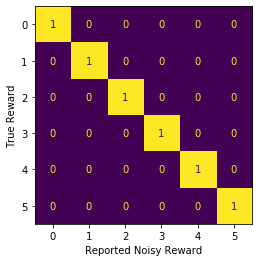

Reward sets:
(0, 0): [-1, 0, -1, -1, -1, -2, -2, -3, -1, -1]
(0, 1): [-2, -1, 0, 0, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, -2, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, -2, 0, -1, -1, 0, -2, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, -1]
(0, 2): [-1, -1, -1, -3, -1, 0, -1, -1, -1]
(0, 3): [-3, 0, -2, -2]
(0, 4): [-1, -3, -1, -3, -4]
(0, 5): [-4, -4, -5, -5, -4, -5, -4]
(0, 6): [-5, -5, -5, -5, -5]
Reward set counts:
Key (0, 0): 10 items
Key (0, 1): 64 items
Key (0, 2): 9 items
Key (0, 3): 4 items
Key (0, 4): 5 items
Key (0, 5): 7 items
Key (0, 6): 5 items


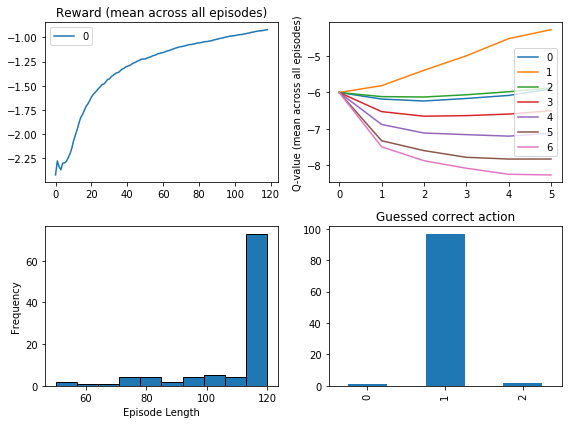

100%|██████████| 100/100 [00:00<00:00, 129.12it/s]


Accuracy: 95.0
Mean episode length: 110.62
Last reward processor:
Estimated confusion matrix:


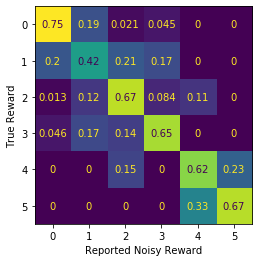

Reward sets:
(0, 0): [-3, -1, -2, 0, -2, -1, -1]
(0, 1): [0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -2, -1, -1, 0, 0, 0, -1, -1, -2, 0, -1, 0, -2, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -2]
(0, 2): [-1, -1, -3, -3, -1, -2, -2, -2]
(0, 3): [-3, 0, -1, -2]
(0, 4): [-2, -3, -3, -3, -2, -3, -3, -3]
(0, 5): [-4, -4, -2, -4]
(0, 6): [-5, -5, -4, -4]
Reward set counts:
Key (0, 0): 7 items
Key (0, 1): 84 items
Key (0, 2): 8 items
Key (0, 3): 4 items
Key (0, 4): 8 items
Key (0, 5): 4 items
Key (0, 6): 4 items


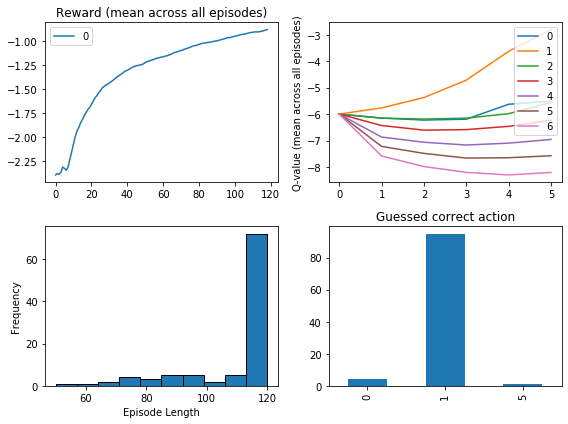

array([-5.510213, -2.805889, -5.559342, -6.231755, -6.959181, -7.576304,
       -8.208303])

In [7]:
# {'target': 99.5, 'params': {'alpha': 0.19008773103975352, 'alpha_decay': 348.142389538547, 'alpha_min': 0.9826884932389596, 'epsilon': 0.28921143036114305, 'epsilon_decay': 445.3413704431987, 'epsilon_min': 0.4278782749167904, 'gamma': 0.9096496016555845, 'surrogate_c_interval': 99.68209813989577, 'surrogate_c_interval_min': 118.43171724479832}}
# With old code
# res = {'target': 99.42999999999999, 'params': {'alpha': 0.12708682895337786, 'alpha_decay': 538.6199305470005, 'alpha_min': 0.3407139712358348, 'epsilon': 0.35959935166361845, 'epsilon_decay': 71.64649449808573, 'epsilon_min': 0.9868919961750783, 'gamma': 0.904542101158647, 'surrogate_c_interval': 19.20687806175444}}
res = {'target': 99.9, 'params': {'alpha': 0.34556072704304774, 'alpha_decay': 397.3707067564393, 'alpha_min': 0.538816734003357, 'epsilon': 0.4191945144032948, 'epsilon_decay': 685.5342808963627, 'epsilon_min': 0.20445224973151743, 'gamma': 0.8781174363909454}}

params = default_params() | res['params']

# params['']

params['plots'] = True
params['noise'] = True
params['surrogate'] = False
plot_mean_q_values(params=params)

params['surrogate'] = True
plot_mean_q_values(params=params)